In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
allFacilities = pd.read_csv("output/describeNetwork.csv", dtype={'primary_naics': object})

In [20]:
# Dioxin reporters from 2013 TRI 
tri2013 = pd.read_csv('data/toxic-release-inventory.ny.2013.geoid.csv')
dioxins_2013 = tri2013[tri2013['chemical']=='DIOXIN AND DIOXIN-LIKE COMPOUNDS']
len(dioxins_2013) # Number of dioxin reporting facilities

20

In [26]:
# Reporting dioxin in each community

dioxin_trim = dioxins_2013[['tri_facility_id','facility_name','primary_naics','n_5_2_stack_air','n_5_1_fugitive_air']]
dioxinMerge = dioxin_trim.merge(allFacilities, on='tri_facility_id')
dioxinMerge = dioxinMerge.drop(['Unnamed: 0', 'Facility','Betweeness','Closeness','Eigenvector','primary_naics_y'], axis=1)
dioxinMerge

,tri_facility_id,facility_name,primary_naics_x,n_5_2_stack_air,n_5_1_fugitive_air,Degrees,Clustering Coefficient,parent_company_name,Chemicals,Community
0,11768NRTHPWATER,NATIONAL GRID NORTHPORT POWER STATION,221112,0.184006,0.000000,81,0.810494,NATIONAL GRID USA,"['BENZO(G,H,I)PERYLENE', 'DIOXIN AND DIOXIN-LI...",3
1,12883NTRNTSHORE,INTERNATIONAL PAPER,322121,1.076389,0.000000,178,0.336380,INTERNATIONAL PAPER CO,"['ACETALDEHYDE', 'AMMONIA', 'BENZO(G,H,I)PERYL...",0
2,12550RSTNG992RA,CCI ROSETON LLC,221112,0.020021,0.000000,49,0.666667,CASTLETON COMMODITIES INTERNATIONAL LLC,"['DIOXIN AND DIOXIN-LIKE COMPOUNDS', 'NAPHTHAL...",1
3,14302CCDNT4700B,OCCIDENTAL CHEMICAL CORP NIAGARA PLANT,325180,0.000182,0.000000,31,0.610753,OCCIDENTAL CHEMICAL HOLDING CORP,"['CHLORINE', 'DIOXIN AND DIOXIN-LIKE COMPOUNDS...",0
4,1461WRDRCH12RID,RED-ROCHESTER LLC - EASTMAN BUSINESS PARK,221112,0.185822,0.000000,136,0.479739,RECYCLED ENERGY DEVELOPMENT LLC,"['BARIUM COMPOUNDS', 'DIOXIN AND DIOXIN-LIKE C...",0
5,12801FNCHP1GLEN,FINCH PAPER LLC,322121,0.297779,0.000000,164,0.378498,FINCH PAPER HOLDINGS,"['AMMONIA', 'BENZO(G,H,I)PERYLENE', 'CHLORINE'...",0
6,13204FBRTK56IND,SYRACUSE ENERGY CORP,221112,0.100016,0.000000,83,0.582427,GDF SUEZ ENERGY N.A.,"['BARIUM COMPOUNDS', 'DIOXIN AND DIOXIN-LIKE C...",0
7,10940RVRSMRD2BA,REVERE SMELTING & REFINING CORP,331492,0.191997,0.000000,67,0.704659,RSR CORP,"['ANTIMONY COMPOUNDS', 'ARSENIC COMPOUNDS', 'C...",0
8,12801GLNSF313LO,LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT,327310,1.623005,0.000000,62,0.782126,LEHIGH HANSON,"['DIOXIN AND DIOXIN-LIKE COMPOUNDS', 'LEAD COM...",0
9,12832TLSCPCHURC,TELESCOPE CASUAL FURNITURE INC,337122,0.131251,0.000000,18,1.000000,NaN,['DIOXIN AND DIOXIN-LIKE COMPOUNDS'],0


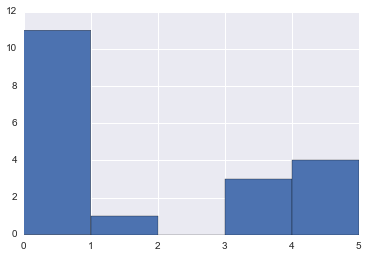

In [29]:
dioxinMerge['Community'].hist(bins=[0,1,2,3,4,5])

In [63]:
# Reporting dioxin in each community

dioxinMerge_community = dioxinMerge[dioxinMerge['Community'] == 4]  # Toggle between communities

dioxinMerge_community

,tri_facility_id,facility_name,primary_naics_x,n_5_2_stack_air,n_5_1_fugitive_air,Degrees,Clustering Coefficient,parent_company_name,Chemicals,Community
11,13148SCPTR11LAM,SCEPTER NEW YORK INC,331314,0.379998,0.00000,148,0.366612,SCEPTER INC,"['AMMONIA', 'COPPER', 'DIOXIN AND DIOXIN-LIKE ...",4
16,13662LMNMCPARKA,ALCOA INC,331313,0.940007,0.00000,193,0.332038,ALCOA INC,"['BENZO(G,H,I)PERYLENE', 'CARBONYL SULFIDE', '...",4
17,13126LCNRLLAKER,NOVELIS CORP,331315,1.749988,1.89999,133,0.400889,NOVELIS CORP,"['ALUMINUM (FUME OR DUST)', 'CHLORINE', 'CHROM...",4
18,14207MRCNB70SAY,AURUBIS BUFFALO INC,331529,0.459993,0.00000,67,0.477160,AURUBIS BUFFALO INC,"['COPPER', 'DIOXIN AND DIOXIN-LIKE COMPOUNDS',...",4


In [59]:
# Reporting dioxin in each community
# dioxinMerge.groupby(['Community','primary_naics_x']).agg(['count'])

In [60]:
# Not reporting dioxin

dioxins_2013_trim = dioxins_2013[['tri_facility_id','facility_name','primary_naics','n_5_2_stack_air','n_5_1_fugitive_air']]
dioxinJoinRight = allFacilities.merge(dioxins_2013_trim, on='tri_facility_id',how='left')
dioxinNULLS = dioxinJoinRight[dioxinJoinRight.isnull().any(axis=1)]

dioxinNULLS_community = dioxinNULLS[dioxinNULLS['Community'] == 4]

dioxinNULLS_community
#len(dioxinNULLS) 

,Unnamed: 0,Facility,Degrees,Clustering Coefficient,Betweeness,Closeness,Eigenvector,tri_facility_id,primary_naics_x,parent_company_name,Chemicals,Community,naics3,facility_name,primary_naics_y,n_5_2_stack_air,n_5_1_fugitive_air
12,12,ROCKTENN - SOLVAY LLC,152,0.450680,0.028065,0.618487,0.034156,13209SLVYP53IND,322130,ROCK-TENN CO,"['HYDROGEN SULFIDE', 'LEAD', 'MERCURY', 'METHA...",4,322130,NaN,NaN,NaN,NaN
13,13,CASTLE OIL PORT MORRIS INC,149,0.475694,0.025991,0.617450,0.047642,10454CSTLL939E1,424710,CASTLE OIL CO,"['LEAD', 'NAPHTHALENE', 'POLYCYCLIC AROMATIC C...",4,424710,NaN,NaN,NaN,NaN
22,22,GM COMPONENTS HOLDINGS LLC,129,0.423934,0.030602,0.599349,0.034323,14094GNRLM200UP,336390,GENERAL MOTORS LLC,"['1,2,4-TRIMETHYLBENZENE', 'CHROMIUM', 'COPPER...",4,336390,NaN,NaN,NaN,NaN
23,23,GM COMPONENTS HOLDINGS LLC,129,0.423934,0.030602,0.599349,0.034323,14603GNRLM1000L,336310,GENERAL MOTORS LLC,"['1,2,4-TRIMETHYLBENZENE', 'CHROMIUM', 'COPPER...",4,336310,NaN,NaN,NaN,NaN
40,40,SABIN METAL CORP,119,0.473437,0.025273,0.588800,0.014472,14546SBNMT1647W,331492,SABIN METAL CORP,"['AMMONIA', 'HYDROCHLORIC ACID (1995 AND AFTER...",4,331492,NaN,NaN,NaN,NaN
43,43,EASTERN ALLOYS INC,106,0.517700,0.020497,0.577708,0.010992,12543STRNLHENRY,331492,EASTERN ALLOYS INC,"['COPPER', 'LEAD', 'ZINC (FUME OR DUST)', 'ZIN...",4,331492,NaN,NaN,NaN,NaN
45,45,MORTON SALT,101,0.569307,0.020224,0.572317,0.013684,14550MRTNS45RIB,311942,MORTON SALT INC,['HYDROCHLORIC ACID (1995 AND AFTER ACID AEROS...,4,311942,NaN,NaN,NaN,NaN
51,51,GOULDS PUMPS ADMINISTRATION INC,96,0.482675,0.022150,0.568779,0.035343,13148GLDSP240FA,333911,ITT CORP,"['CHROMIUM', 'COPPER', 'MANGANESE', 'NICKEL', ...",4,333911,NaN,NaN,NaN,NaN
53,53,GENERAL ELECTRIC CO CPQP,96,0.610746,0.017817,0.563553,0.009694,12328GNRLL381UP,335999,GENERAL ELECTRIC CO (GE CO),"['CHROMIUM', 'COPPER', 'LEAD']",4,335999,NaN,NaN,NaN,NaN
62,62,METALICO ALUMINUM RECOVERY INC,88,0.691223,0.013867,0.556732,0.009241,13206RTHBR6223T,331314,METALICO INC,"['ALUMINUM (FUME OR DUST)', 'COPPER', 'LEAD']",4,331314,NaN,NaN,NaN,NaN


In [61]:
# List of dioxin non-reporters in each community that have a counter part (same NAICS code) reporting in community

#dioxinNULLS['primary_naics_x'].isin(dioxinMerge['primary_naics_x']) 
dioxinMerge_community.merge(dioxinNULLS_community, on='primary_naics_x')

,tri_facility_id_x,facility_name_x,primary_naics_x,n_5_2_stack_air_x,n_5_1_fugitive_air_x,Degrees_x,Clustering Coefficient_x,parent_company_name_x,Chemicals_x,Community_x,...,Eigenvector,tri_facility_id_y,parent_company_name_y,Chemicals_y,Community_y,naics3,facility_name_y,primary_naics_y,n_5_2_stack_air_y,n_5_1_fugitive_air_y
